## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  59.202403   672.778173  0.185315   8.767103   137.930049
1  41.384984  1470.187536  0.827365  10.154615  1217.052923
2  12.283917  1339.618623  0.945177   2.203035  1265.997708
3  45.072254   644.363687  0.042338   6.849138    52.646257
4  17.105116   298.702797  0.684784   7.367517   205.281109


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0346977	total: 57.2ms	remaining: 57.2s
1:	learn: 1.0243274	total: 57.8ms	remaining: 28.8s
2:	learn: 1.0144398	total: 58.3ms	remaining: 19.4s
3:	learn: 1.0034660	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9893036	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9763642	total: 59.9ms	remaining: 9.92s
6:	learn: 0.9623814	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9497481	total: 60.9ms	remaining: 7.55s
8:	learn: 0.9353533	total: 61.3ms	remaining: 6.75s
9:	learn: 0.9222007	total: 61.8ms	remaining: 6.12s
10:	learn: 0.9111030	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8947139	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8814035	total: 63.3ms	remaining: 4.81s
13:	learn: 0.8670578	total: 63.8ms	remaining: 4.49s
14:	learn: 0.8534869	total: 64.2ms	remaining: 4.21s
15:	learn: 0.8436731	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8311681	total: 65.2ms	remaining: 3.77s
17:	learn: 0.8195310	total: 65.8ms	remaining: 3.59s
18:	learn: 0.8103999	total: 66.2ms	remaining

110:	learn: 0.2457806	total: 105ms	remaining: 842ms
111:	learn: 0.2427795	total: 106ms	remaining: 838ms
112:	learn: 0.2402534	total: 106ms	remaining: 833ms
113:	learn: 0.2377207	total: 106ms	remaining: 827ms
114:	learn: 0.2355469	total: 107ms	remaining: 822ms
115:	learn: 0.2327958	total: 107ms	remaining: 818ms
116:	learn: 0.2295497	total: 108ms	remaining: 812ms
117:	learn: 0.2273426	total: 108ms	remaining: 807ms
118:	learn: 0.2249822	total: 108ms	remaining: 802ms
119:	learn: 0.2220629	total: 109ms	remaining: 797ms
120:	learn: 0.2190360	total: 109ms	remaining: 792ms
121:	learn: 0.2171733	total: 110ms	remaining: 788ms
122:	learn: 0.2148063	total: 110ms	remaining: 784ms
123:	learn: 0.2128167	total: 110ms	remaining: 780ms
124:	learn: 0.2101932	total: 111ms	remaining: 775ms
125:	learn: 0.2078777	total: 111ms	remaining: 771ms
126:	learn: 0.2056233	total: 111ms	remaining: 766ms
127:	learn: 0.2031131	total: 112ms	remaining: 762ms
128:	learn: 0.2012838	total: 112ms	remaining: 758ms
129:	learn: 

296:	learn: 0.0497609	total: 186ms	remaining: 440ms
297:	learn: 0.0494730	total: 186ms	remaining: 439ms
298:	learn: 0.0491846	total: 187ms	remaining: 438ms
299:	learn: 0.0488692	total: 187ms	remaining: 437ms
300:	learn: 0.0486687	total: 188ms	remaining: 436ms
301:	learn: 0.0484019	total: 188ms	remaining: 435ms
302:	learn: 0.0481147	total: 189ms	remaining: 434ms
303:	learn: 0.0478771	total: 189ms	remaining: 433ms
304:	learn: 0.0475400	total: 190ms	remaining: 432ms
305:	learn: 0.0472500	total: 190ms	remaining: 431ms
306:	learn: 0.0470198	total: 191ms	remaining: 430ms
307:	learn: 0.0467711	total: 191ms	remaining: 430ms
308:	learn: 0.0464605	total: 192ms	remaining: 429ms
309:	learn: 0.0462952	total: 192ms	remaining: 428ms
310:	learn: 0.0460303	total: 193ms	remaining: 427ms
311:	learn: 0.0458493	total: 193ms	remaining: 426ms
312:	learn: 0.0456226	total: 194ms	remaining: 425ms
313:	learn: 0.0454117	total: 194ms	remaining: 423ms
314:	learn: 0.0451626	total: 194ms	remaining: 423ms
315:	learn: 

526:	learn: 0.0219145	total: 288ms	remaining: 258ms
527:	learn: 0.0218285	total: 288ms	remaining: 258ms
528:	learn: 0.0217510	total: 289ms	remaining: 257ms
529:	learn: 0.0217073	total: 289ms	remaining: 256ms
530:	learn: 0.0216207	total: 289ms	remaining: 256ms
531:	learn: 0.0215780	total: 290ms	remaining: 255ms
532:	learn: 0.0214692	total: 290ms	remaining: 254ms
533:	learn: 0.0214170	total: 291ms	remaining: 254ms
534:	learn: 0.0213758	total: 291ms	remaining: 253ms
535:	learn: 0.0213354	total: 292ms	remaining: 252ms
536:	learn: 0.0212774	total: 292ms	remaining: 252ms
537:	learn: 0.0211946	total: 292ms	remaining: 251ms
538:	learn: 0.0211551	total: 293ms	remaining: 250ms
539:	learn: 0.0211162	total: 293ms	remaining: 250ms
540:	learn: 0.0210350	total: 293ms	remaining: 249ms
541:	learn: 0.0209968	total: 294ms	remaining: 248ms
542:	learn: 0.0209526	total: 294ms	remaining: 248ms
543:	learn: 0.0208728	total: 295ms	remaining: 247ms
544:	learn: 0.0207823	total: 295ms	remaining: 246ms
545:	learn: 

710:	learn: 0.0128719	total: 367ms	remaining: 149ms
711:	learn: 0.0128192	total: 368ms	remaining: 149ms
712:	learn: 0.0127499	total: 368ms	remaining: 148ms
713:	learn: 0.0127050	total: 369ms	remaining: 148ms
714:	learn: 0.0126691	total: 369ms	remaining: 147ms
715:	learn: 0.0126299	total: 370ms	remaining: 147ms
716:	learn: 0.0125933	total: 370ms	remaining: 146ms
717:	learn: 0.0125652	total: 370ms	remaining: 145ms
718:	learn: 0.0125496	total: 371ms	remaining: 145ms
719:	learn: 0.0124808	total: 371ms	remaining: 144ms
720:	learn: 0.0124693	total: 371ms	remaining: 144ms
721:	learn: 0.0124541	total: 372ms	remaining: 143ms
722:	learn: 0.0124105	total: 372ms	remaining: 143ms
723:	learn: 0.0123832	total: 373ms	remaining: 142ms
724:	learn: 0.0123469	total: 373ms	remaining: 141ms
725:	learn: 0.0123031	total: 373ms	remaining: 141ms
726:	learn: 0.0122361	total: 374ms	remaining: 140ms
727:	learn: 0.0122214	total: 374ms	remaining: 140ms
728:	learn: 0.0121859	total: 375ms	remaining: 139ms
729:	learn: 

953:	learn: 0.0071385	total: 468ms	remaining: 22.6ms
954:	learn: 0.0071126	total: 469ms	remaining: 22.1ms
955:	learn: 0.0071096	total: 469ms	remaining: 21.6ms
956:	learn: 0.0070828	total: 470ms	remaining: 21.1ms
957:	learn: 0.0070501	total: 470ms	remaining: 20.6ms
958:	learn: 0.0070472	total: 471ms	remaining: 20.1ms
959:	learn: 0.0070356	total: 471ms	remaining: 19.6ms
960:	learn: 0.0070093	total: 471ms	remaining: 19.1ms
961:	learn: 0.0070063	total: 472ms	remaining: 18.6ms
962:	learn: 0.0069813	total: 472ms	remaining: 18.1ms
963:	learn: 0.0069437	total: 472ms	remaining: 17.6ms
964:	learn: 0.0069219	total: 473ms	remaining: 17.1ms
965:	learn: 0.0068998	total: 473ms	remaining: 16.7ms
966:	learn: 0.0068734	total: 474ms	remaining: 16.2ms
967:	learn: 0.0068705	total: 474ms	remaining: 15.7ms
968:	learn: 0.0068473	total: 474ms	remaining: 15.2ms
969:	learn: 0.0068444	total: 475ms	remaining: 14.7ms
970:	learn: 0.0068185	total: 475ms	remaining: 14.2ms
971:	learn: 0.0068156	total: 476ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

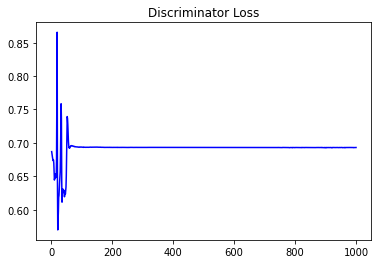

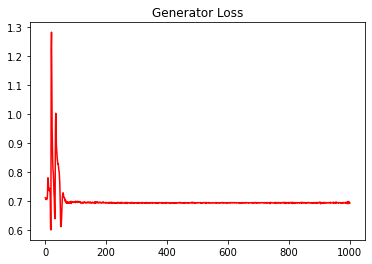

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0056578561278718045


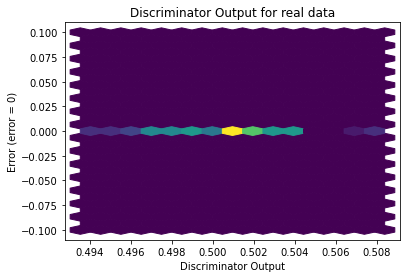

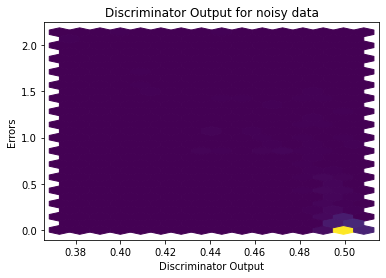

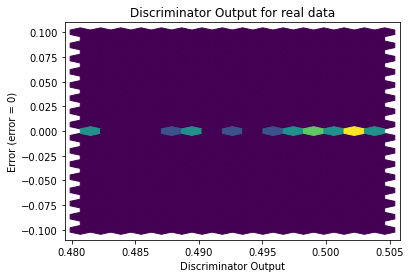

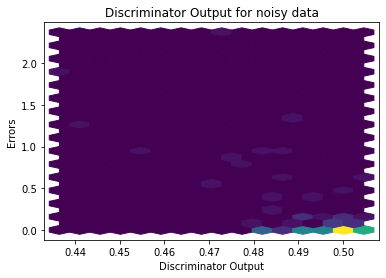

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


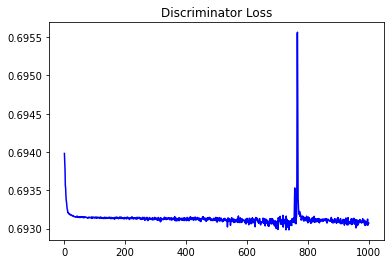

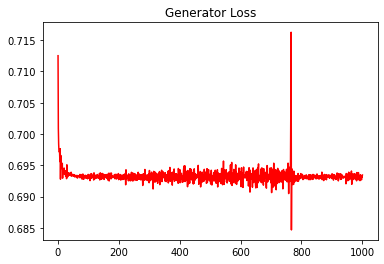

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.018440187854017305


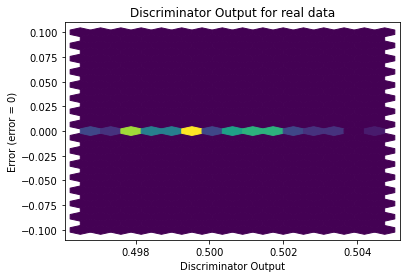

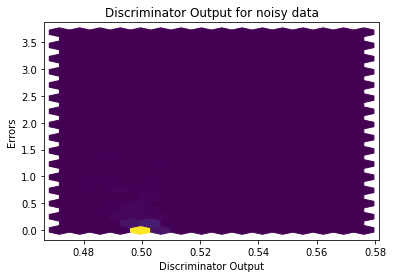

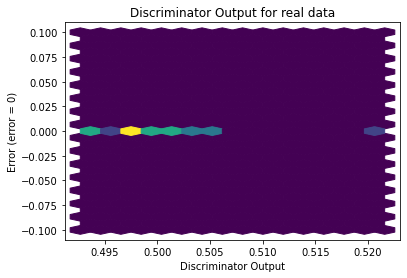

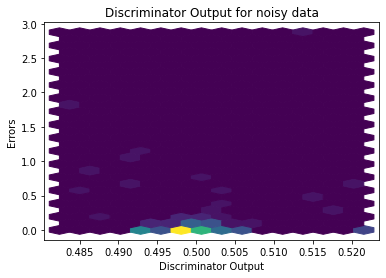

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[2.2865e-05]], requires_grad=True)
